## Web3 / Blockchain Funding Analysis - Q3 2022

In this notebook, we will do an analysis on the funding of the blockchain / web3 companies in the last quarter i.e., Q3 2022. The data for this analysis comes from [CoinCarp](https://www.coincarp.com/fundraising/) and so please refer to the site for data access.

The objective of the notebook is to see how the funding landscape has changed over time (y-o-y and q-o-q) and also the major themes and the active investors in the ecosystem.

Let us dive deep in! We will start with importing the necessary modules.

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code cells."></form>''')

In [2]:
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

## Dataset Description

In [3]:
df = pd.read_csv("../data/coin_carp/crypto_funding.csv")
df.head()

,Name,Category,FundingRoundType,FundingAmount,Investors,FundingDate
0,Pine Street Labs,Infrastructure,Seed,$6M,"Polychain Capital, Blockchain Capital, Coinbas...","October 14, 2022"
1,Fabric Systems,Others,Seed,$13M,"Metaplanet Holdings, Blockchain.com, 8090 Part...","October 14, 2022"
2,Uniswap,DeFi,Series B,$165M,"Andreessen Horowitz(a16z), Paradigm, SV Angel,...","October 13, 2022"
3,Copper,CeFi,Series C,$196M,--,"October 13, 2022"
4,VUZ,Others,Series B,$20M,"Caruso Ventures, Vision\n Ventures, e& Capital...","October 13, 2022"


We have the following information in our dataset.

* Name - Name of the company
* Category - Category of the company like NFTs, DeFi etc
* FundingRoundType - Type of funding round i.e., whether this is Seed round, Series A etc
* FundingAmount - Amount of funding in USD
* Investors - Main investors in the funding round
* FundingDate - Date of the funding

Now let us clean the dataset so that we can do our analysis

In [4]:
def clean_amount(amt):
    """Function to clean the amount column"""
    amt = amt.replace("$","")
    amt = amt.replace("M","e6")
    amt = amt.replace("B",'e9')
    amt = amt.replace(",","")
    if amt == "--":
        amt = 0
    return float(amt)

def get_first_day_of_month(dt_value):
    """Function to get the first date of month"""
    return datetime.date(dt_value.year, dt_value.month, 1)
    
# Cleaning & Feature creation
df["FundingDate"] = pd.to_datetime(df["FundingDate"])
df["USDAmount"] = df["FundingAmount"].apply(lambda x: clean_amount(x))
df["Year"] = df["FundingDate"].dt.year
df["Month"] = df["FundingDate"].dt.month
df["YearMonth"] = df["FundingDate"].apply(lambda x: get_first_day_of_month(x))
df

,Name,Category,FundingRoundType,FundingAmount,Investors,FundingDate,USDAmount,Year,Month,YearMonth
0,Pine Street Labs,Infrastructure,Seed,$6M,"Polychain Capital, Blockchain Capital, Coinbas...",2022-10-14,6000000.0,2022,10,2022-10-01
1,Fabric Systems,Others,Seed,$13M,"Metaplanet Holdings, Blockchain.com, 8090 Part...",2022-10-14,13000000.0,2022,10,2022-10-01
2,Uniswap,DeFi,Series B,$165M,"Andreessen Horowitz(a16z), Paradigm, SV Angel,...",2022-10-13,165000000.0,2022,10,2022-10-01
3,Copper,CeFi,Series C,$196M,--,2022-10-13,196000000.0,2022,10,2022-10-01
4,VUZ,Others,Series B,$20M,"Caruso Ventures, Vision\n Ventures, e& Capital...",2022-10-13,20000000.0,2022,10,2022-10-01
...,...,...,...,...,...,...,...,...,...,...
3558,FunFair,Web3,Unknown,$26M,"Pantera Capital, Blocktower Capital, KR1",2017-07-06,26000000.0,2017,7,2017-07-01
3559,NYDIG,CeFi,Series A,$50M,--,2017-07-01,50000000.0,2017,7,2017-07-01
3560,LedgerX,CeFi,Series B,$11.4M,"CoinFund, Digital Finance Group",2017-05-22,11400000.0,2017,5,2017-05-01
3561,Symbiont,Infrastructure,Series A,$15M,"Wicklow Capital, SenaHill Partners, Medici Ven...",2017-05-04,15000000.0,2017,5,2017-05-01


As we are focussing on the quarterly results, let us compare the Q3 2022 results with Q2 2022 to get quarter on quarter comparison (q-o-q) and Q3 2021 to get year on year comparison (y-o-y).

## Number of Fundraises

We will create a `Quarter` columns to store the quarter information.

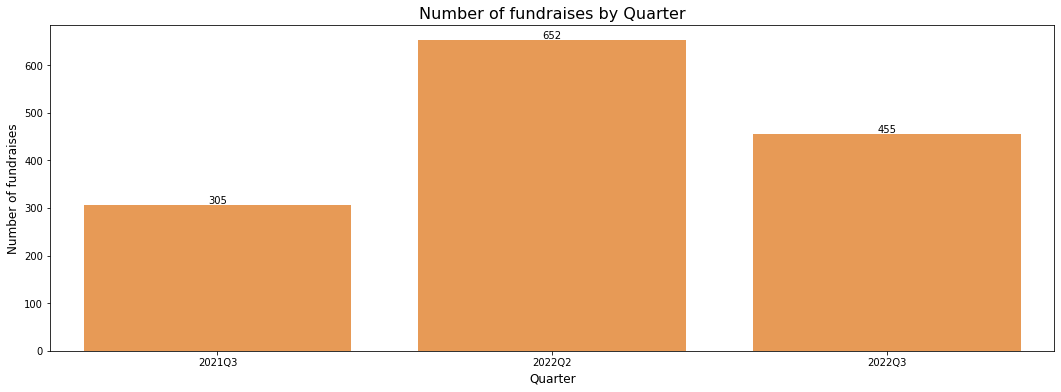

In [5]:
df["Quarter"] = None
df["Quarter"][
    (df["YearMonth"] > datetime.date(2022,6,30)) &
    (df["YearMonth"] < datetime.date(2022,10,1))
] = "2022Q3"
df["Quarter"][
    (df["YearMonth"] > datetime.date(2022,3,31)) &
    (df["YearMonth"] < datetime.date(2022,7,1))
] = "2022Q2"
df["Quarter"][
    (df["YearMonth"] > datetime.date(2021,6,30)) &
    (df["YearMonth"] < datetime.date(2021,10,1))
] = "2021Q3"
temp_df = df["Quarter"].value_counts().sort_index().reset_index()
temp_df.columns = ["Quarter", "NumRaises"]

# Number of fund raises in each quarter
plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Quarter"], y=temp_df["NumRaises"], alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of fundraises', fontsize=12)
plt.title('Number of fundraises by Quarter', fontsize=16)
plt.show()

#### Inference:
* 455 fundraises are done in the last quarter
* There is a `quarter on quarter decline` in the number of fundraises from 652 to 455 by `30%`
* There is a `year on year increase` in the number of fundraises from 305 to 455 by `49%`

Now let us check the performance in each month

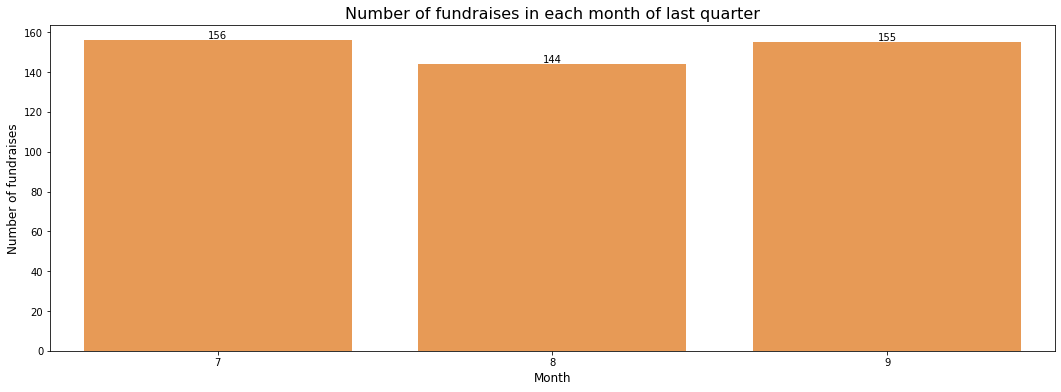

In [9]:
qtr_df = df[
    (df["YearMonth"] > datetime.date(2022,6,30)) &
    (df["YearMonth"] < datetime.date(2022,10,1))
]
temp_df = qtr_df["Month"].value_counts().sort_index().reset_index()
temp_df.columns = ["Month", "NumRaises"]
plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Month"], y=temp_df["NumRaises"], alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of fundraises', fontsize=12)
plt.title('Number of fundraises in each month of last quarter', fontsize=16)
plt.show()

There is a small dip in the number of fundraises in August. July and September are almost same with respect to the number of fundraises.

## Funding Amount Analysis

Now let us look at the amount of fund raised in the quarter and check its performance with the history.

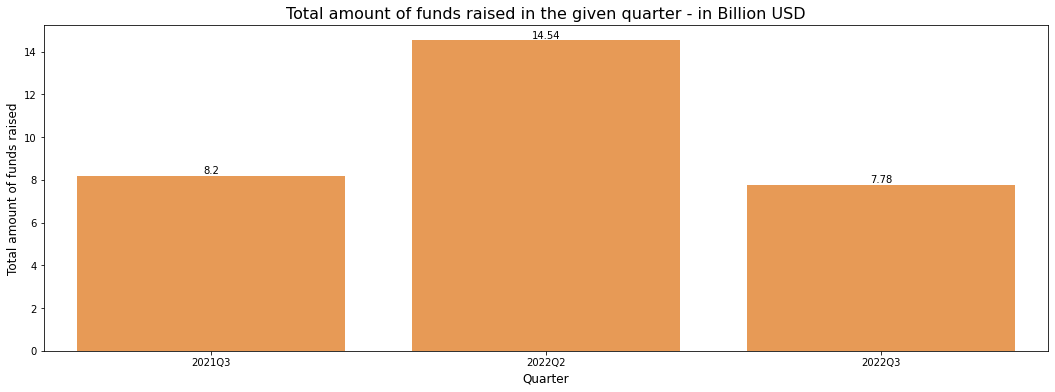

In [5]:
temp_df = df.groupby("Quarter")["USDAmount"].sum().sort_index().reset_index()
temp_df.columns = ["Quarter", "AmtRaised"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Quarter"], y=np.round(temp_df["AmtRaised"]/1e9,2), alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total amount of funds raised', fontsize=12)
plt.title('Total amount of funds raised in the given quarter - in Billion USD', fontsize=16)
plt.show()

#### Inference:
* `7.78 Billion USD` was raised by companies in the last quarter
* There is a `5% y-o-y decline` in the amount raised
* There is a `46% q-o-q decline` in the amount raised

Now let us check the monthly performance

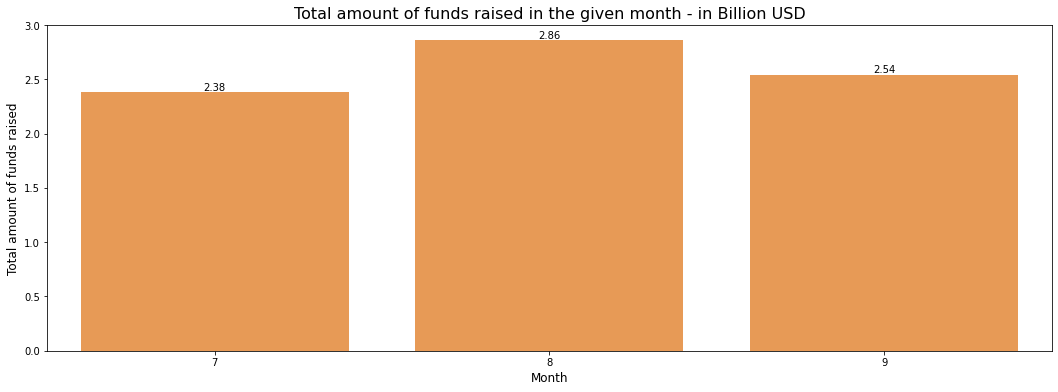

In [11]:
temp_df = qtr_df.groupby("Month")["USDAmount"].sum().sort_index().reset_index()
temp_df.columns = ["Month", "AmtRaised"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Month"], y=np.round(temp_df["AmtRaised"]/1e9,2), alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total amount of funds raised', fontsize=12)
plt.title('Total amount of funds raised in the given month - in Billion USD', fontsize=16)
plt.show()

Total amount raised in August is more compared to July & September

## Mean & Median Fundraises

Now let us check the mean and median fundraise values in the quarters to see if there is any trend.

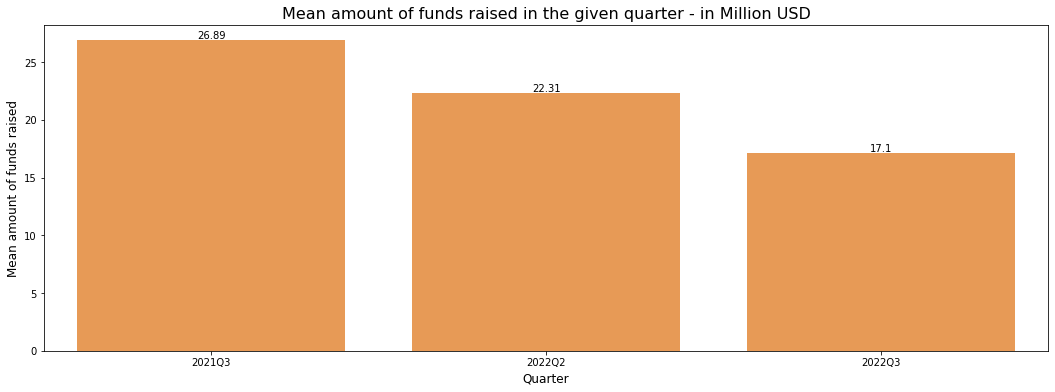

In [6]:
temp_df = df.groupby("Quarter")["USDAmount"].mean().sort_index().reset_index()
temp_df.columns = ["Quarter", "AmtRaised"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Quarter"], y=np.round(temp_df["AmtRaised"]/1e6,2), alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
# plt.xticks(rotation='vertical')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Mean amount of funds raised', fontsize=12)
plt.title('Mean amount of funds raised in the given quarter - in Million USD', fontsize=16)
plt.show()

The mean amount of funds raised is declining quarter on quarter.

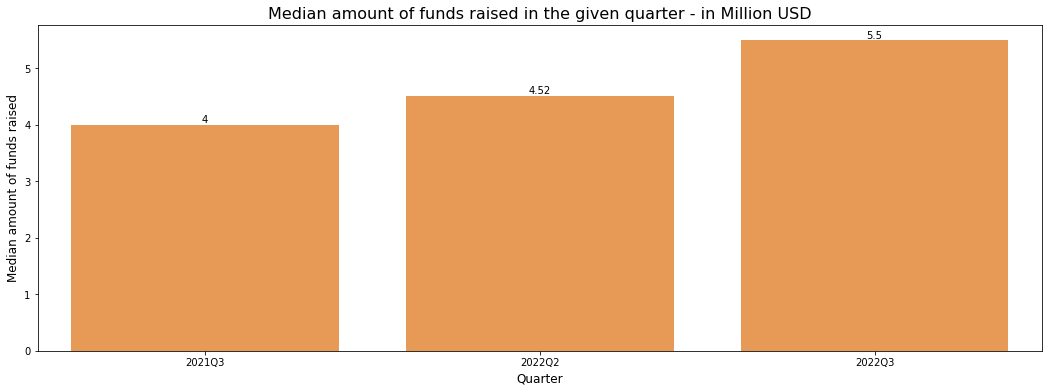

In [7]:
temp_df = df.groupby("Quarter")["USDAmount"].median().sort_index().reset_index()
temp_df.columns = ["Quarter", "AmtRaised"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Quarter"], y=np.round(temp_df["AmtRaised"]/1e6,2), alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
# plt.xticks(rotation='vertical')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Median amount of funds raised', fontsize=12)
plt.title('Median amount of funds raised in the given quarter - in Million USD', fontsize=16)
plt.show()

Voila! The median fundraising amount is increasing quarter on quarter while the mean is decreasing. Presence of few very high funding rounds could have affected the mean value of the previous quarters.

## Funding Round Type Analysis

Now let us look at the funding round types in the last quarter - Q3 2022.

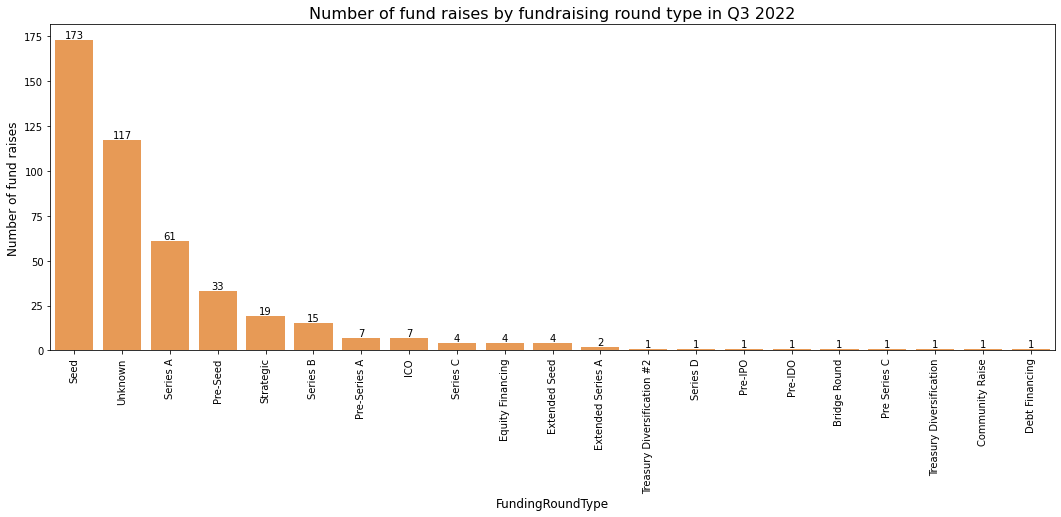

In [8]:
temp_df = qtr_df["FundingRoundType"].value_counts().reset_index()
temp_df.columns = ["FundingRoundType", "NumRaises"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["FundingRoundType"], y=temp_df["NumRaises"], alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.xlabel('FundingRoundType', fontsize=12)
plt.ylabel('Number of fund raises', fontsize=12)
plt.title('Number of fund raises by fundraising round type in Q3 2022', fontsize=16)
plt.show()

#### Inference:
* There are 173 seed rounds done in the last quarter
* There are 61 Series A rounds, 15 Series B rounds, 4 Series C rounds, 1 Series D round and so on
* There are 33 Pre-Seed rounds, 19 Strategic rounds and 7 Pre-Series rounds completed in the last quarter

## Company Category Analysis

In this section, let us explore the categories that got funded in the last quarter. Please note that one company can fall into more than one category.

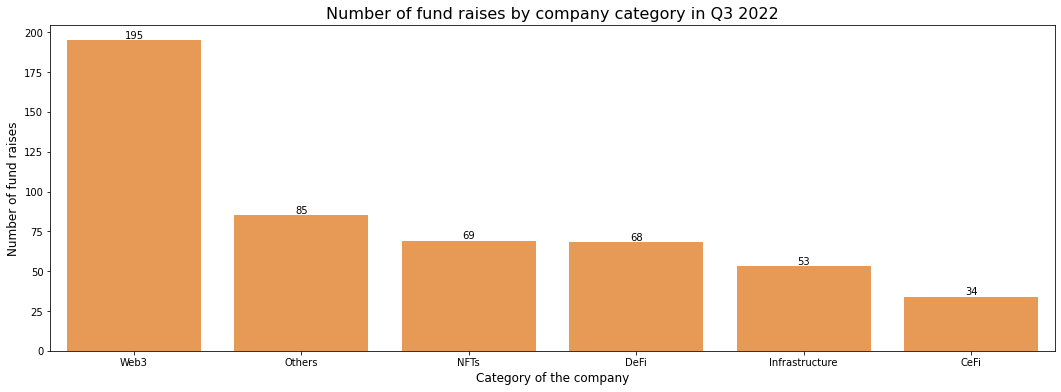

In [11]:
cat_list = []
for cat in qtr_df["Category"].values:
    for c in cat.split(","):
        if c.strip() != "":
            cat_list.append(c.strip())
temp_df = pd.Series(cat_list).value_counts().reset_index()
temp_df.columns = ["Category", "Count"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Category"], y=temp_df["Count"], alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
# plt.xticks(rotation='vertical')
plt.xlabel('Category of the company', fontsize=12)
plt.ylabel('Number of fund raises', fontsize=12)
plt.title('Number of fund raises by company category in Q3 2022', fontsize=16)
plt.show()

#### Inference:
* `Web3` as a category got the most number of funding with 195 fund raises. 
* `NFTs` comes in as second with 69 fundraises closely followed by `DeFi`

## Investors Analysis

Let us check the top investors who made most number of investments in the last quarter.

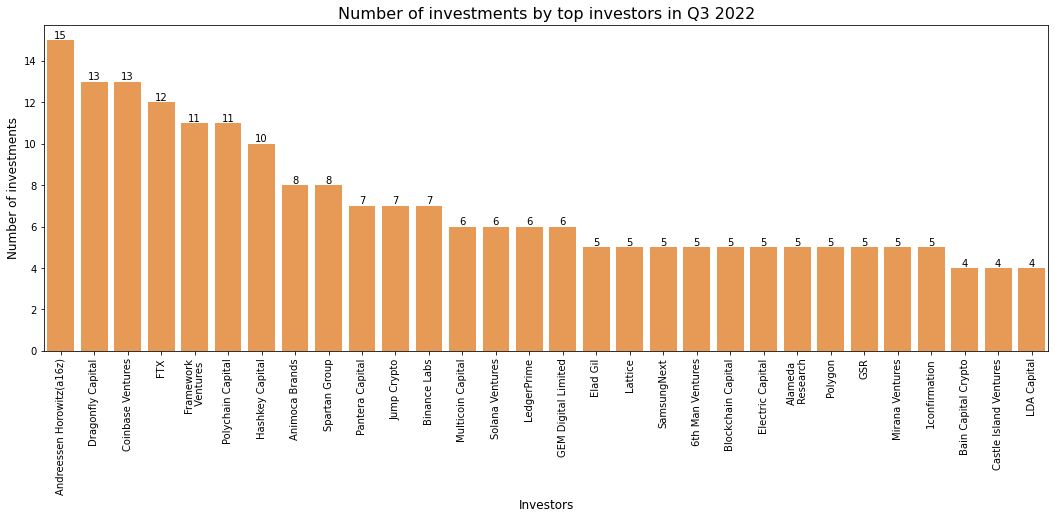

In [10]:
inv_list = []
for inv in qtr_df["Investors"].values:
    for i in inv.split(","):
        i = i.replace("‚Ä¶","").replace("--","")
        if i.strip() != "":
            inv_list.append(i.strip())
temp_df = pd.Series(inv_list).value_counts().reset_index().head(30)
temp_df.columns = ["Investors", "Count"]

plt.figure(figsize=(18,6))
ax = sns.barplot(x=temp_df["Investors"], y=temp_df["Count"], alpha=0.8, color=color[1])
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors', fontsize=12)
plt.ylabel('Number of investments', fontsize=12)
plt.title('Number of investments by top investors in Q3 2022', fontsize=16)
plt.show()

#### Inference:
* `a16z` made the most number of investments with 15 investments made in the last quarter
* `Dragonfly Capital` & `Coinbase Ventures` made 13 investments each and came in second
* Other top investors are `FTX`, `Framework Ventures`, `Polychain Capital` and so on.